## 9. Feladatsor (diffúzió)

**Differenciálegyenlet**

Tekintsük az
$$
\partial_t u = \partial_{xx} u
$$

parciális differenciálegyenletet.

### 1. Feladat

Mutassuk meg, hogy az 
$$
v(t, x) = \frac{1}{2\sqrt {t}} e^{-\frac12 (\frac{x}{2\sqrt {t}})^2}
$$
függvény megoldása ennek az egyenletnek.

**Megoldás:**

Legyen
$$ u(t,x) = v(t^2/2, x). $$
Ekkor
$$
tu(t, x) = e^{-\frac12 (\frac{x}{t})^2},
$$
mely függvény néhány deriváltja az alábbi:

$$
\frac{d}{dt} (tu) = \left( -\frac{1}{2}(-2)t^{-3}x^2 \right) tu = t^{-3}x^2 tu,
$$

$$
\frac{d}{dx} (tu) = t \partial_{x} u = -\frac{1}{2} 2x t^{-2} (t u) = \left(- x t^{-2}\right) tu,
$$

$$
\frac{d^2}{dx^2} (tu) = t \partial_{xx} u = - t^{-2} tu - xt^{-2} \frac{d}{dx}(tu) =
- t^{-2} tu + xt^{-2} \left(- x t^{-2}\right) tu =
\left( - t^{-2} + x^2 t^{-4} \right)  (t u).
$$

Ezeket felhasználva, tekintve a nullára rendezett differenciálegyenletet, kapjuk, hogy
$$ \left( \partial_t - \partial_{xx}\right) v 
= \left(\frac{1}{t} \partial_t - \partial_{xx} \right) u
= t^{-2}\frac{d}{dt}(tu) - t^{-2} u - \partial_{xx}u = \left( 
t^{-2}\frac{d}{dt}  -t^{-3} - t^{-1} \frac{d^2}{dx^2}
\right) (tu),
$$

ahova behelyettesítve az imént kiszámolt mennyiségeket, adódik, hogy
$$
\left( 
t^{-2}\left( t^{-3}x^2 \right)  - t^{-3} - t^{-1} \left( - t^{-2} + x^2t^{-4} \right)
\right) (tu) = 0,
$$
azaz $v$ valóban megoldása az egyenletnek.

### 2. Feladat

Ábrázoljuk a fenti $v$ függvényt néhány különböző $t$-re.

In [1]:
using Plots

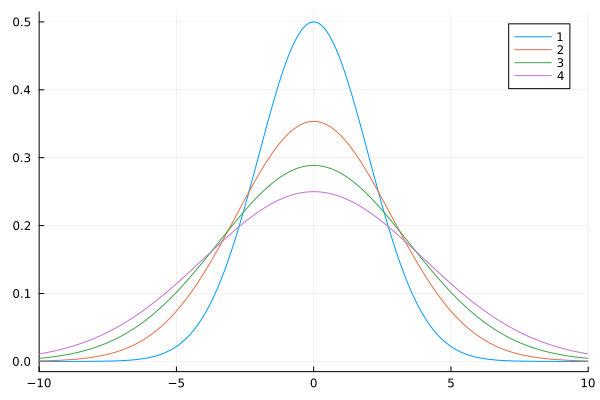

In [2]:
ts = 1:4

v(t, x) = (2 * sqrt(t))^(-1) * exp(-1/2 * (x/(2*sqrt(t)))^2)

p = plot()
for t = ts
    plot!(x -> v(t, x), xlim=(-10, 10), label=t)
end

display(p)

---
Hővezetés. Folytonos idejű bolyongás (egységnyi idő alatt tett bizonyos hosszú lépések esetén).

Tehát elképzelhetjük, hogy kezdetben egy (végtelen hosszú) rúd középen hevítve van, majd ez szépen idővel kihűl.

---
**Diszkretizáció**


A fenti $v$ függvény persze csak egy példa az egyenlet megoldásaira. Igaz, hogy ennek az egyenletnek az analitikus megoldása is felírható -tulajdonképpen a kezdeti feltételt kell konvolválni egyre szétterültebb haranggörbékkel-, azonban bonyolultabb egyenleteknek sokszor csak numerikus megoldásában reménykedhetünk, tovább az itt megismerhető alapötletek azoknál az egyenleteknél is használhatók.

Első lépésként szemidiszkretizáljunk, azaz vezessük vissza a parciális differenciálegyenletünket egy közönséges differenciálegyenlet-rendszerre.
Ehhez tehát az $x$ változó által indexelt végtelendimenziós teret kell egy végesdimenziósra cserélnünk, valamint ezzel együtt a $\partial_{xx}$ operátort egy olyanra, mely ezen a végesdimenziós téren hat.

Pontosítsuk az egyenletünket: az idő legyen pozitív, a teret pedig szűkítsük le a $[0,1]$ intervallumra, valamint vegyünk egy $u_0$ kezdeti feltételt, és egy homogén Dirichlet-peremfeltételt.

$$
\begin{cases}
    \partial_t u &= \partial_{xx} u,  &(0, \infty) \times (0, 1)\text{-en} \\
    \\
    u(0, x)  &= u_0(x), & 0 \leq x \leq 1 \\
    \\
    u(t, 0) &= 0, &0 < t \\
    u(t, 1) &= 0. &0 < t    
\end{cases}
$$

### 3. Feladat

Legyen $g$ egy kétszer folytonosan diff.ható valós-valós függvény, mely definiált a $0$ egy környezetén. Milyen formulát tudnánk adni a $g''(0)$ érték közelítésére?

**Megoldás:**

Mindenki emlékszik, hogy
$$
g''(0) \approx \frac{1}{h^2} \left( g(h) - 2g(0) + g(-h) \right)
$$
jó lesz. Ha nem, akkor célszerű sorbafejteni a $0$ körül.

### 4. Feladat

Vegyünk a $[0,1]$ intervallum egy egyenletes, $N+2$ pontból álló, $(x_j)_{j=0}^{N+1}$ rácsozását - magyarul legyen $x_j = j/(N+1)$.

Ha $g: [0,1] \mapsto \mathbb{R}$, akkor legyen a $g$ függvény diszkretizáltja
$$
g^h = \left( g(x_j) \right)_{j=0}^{N+1},
$$
azaz egy $N+2$ hosszú vektor. 

A peremfeltétel miatt minket csak olyan függvények érdekelnek, melyek a végpontokban $0$ értéket vesznek fel. Ennek a diszkretizált megfelelője persze az, hogy $g^h_0 = g^h_{N+1} = 0$. A feltétel következtében teljesen megfelelő az is, ha a $g^h$ vektor csak a belső rácspontokban felvett értékeket tartalmazza, vagyis innentől feltehetjük, hogy $g^h$ hossza $N$.

A $\partial_{xx}$ operáció lineáris. Szeretnénk ha a végesdimenziós megfelelő is lineáris lenne. Ha lineáris, akkor van mátrixa.  Milyen mátrix fogja létrehozni a $g^h$ vektorból azt a vektort, melynek $j$. koordinátája a 3. feladatban szereplő formula szerinti közelítése a $g''(x_j)$ értéknek minden $x_j$ belső rácspont esetén (tehát $j=1\ldots n$)?

**Megoldás:**

A szokásos tridiagonális mátrixunk: $\Delta_{0, h} = h^{-2} \text{tridiag}(1, -2, 1)$.

### 5. Feladat

Írjunk kódot, ami létrehozza ezt a mátrixot adott $N$ esetén.

In [3]:
function D_2(n)
    A = zeros(n, n)
    for i=1:n
        A[i, max(1, i-1)] = 1
        A[i, min(n, i+1)] = 1
        A[i,           i] = -2
    end

    return A
end

D_2 (generic function with 1 method)

In [4]:
D_2(3)

3×3 Matrix{Float64}:
 -2.0   1.0   0.0
  1.0  -2.0   1.0
  0.0   1.0  -2.0

In [5]:
function Delta_0h(n)
    return D_2(n) * (n+1)^2
end

Delta_0h(3)

3×3 Matrix{Float64}:
 -32.0   16.0    0.0
  16.0  -32.0   16.0
   0.0   16.0  -32.0

### 6. Feladat

Gondoljuk meg, hogy a $x \mapsto \sin(ax)$ függvényeken a $\partial_{xx}$ operátor skalárszorásként viselkedik. Milyen skalárokkal való szorzásnak felel meg az operátor hatása ezeken a függvényeken?

**Megoldás:**
$$\frac{d^2}{dx^2} \sin(kx) = - a^2 \sin(kx)$$

### 7. Feladat

Milyen $a$ értékek jöhetnek szóba, ha szeretnénk, hogy az $x \mapsto \sin(ax)$ függvényre teljesüljön a homogén Dirichlet-peremfeltétel?

**Megoldás:**

$$
\sin(0\cdot a) = 0 = \sin(1 \cdot a) \qquad \iff \qquad \left\{ a\cdot 0, a \cdot 1 \right\} \subseteq \pi\mathbb{Z}
$$

### 8. Feladat

Idézzük fel, hogy 
$$
\sin(x+y) = \sin(x)\cos(y) + \sin(y)\cos(x),
$$
majd határozzuk meg a $h^2\Delta_{0,h}$ mátrix sajátértékeit.

**Megoldás:**

$$
\sin(x+h) + \sin(x-h) = \sin(x)\cos(h) + \cos(x)\sin(h) + \sin(x)\cos(-h) + \sin(-h)\cos(x)  
= 2\sin(x)\cos(h)
$$

$$
\sin(x+h) - 2\sin(x) + \sin(x-h) = 2(\cos(h) - 1)\sin(x),
$$

ahol

$$
2(\cos(h) - 1) = -4\sin^2\left(\frac{h}{2}\right).
$$

Ha a rácsköz $1/(n+1)$, akkor az $t \mapsto \sin(k\pi t)$ függvényhez tartozó vektor esetén $x = kt, h = k/(N+1)$ behelyettesítve kapjuk, hogy 
$$
\lambda_k = 2\left( \cos\left(\frac{k}{N+1}\pi\right) - 1 \right).
$$

### 9. Feladat
Ellenőrizzük az előző feladatban kapott megoldást numerikusan.

In [6]:
using LinearAlgebra

In [7]:
A = D_2(5)

5×5 Matrix{Float64}:
 -2.0   1.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0
  0.0   0.0   1.0  -2.0   1.0
  0.0   0.0   0.0   1.0  -2.0

In [8]:
eigvals(A)

5-element Vector{Float64}:
 -3.7320508075688776
 -3.0
 -1.9999999999999998
 -1.0
 -0.26794919243112275

In [9]:
[2*(cos(k*pi/6) - 1) for k=5:(-1):1]

5-element Vector{Float64}:
 -3.7320508075688776
 -2.9999999999999996
 -1.9999999999999998
 -0.9999999999999998
 -0.2679491924311226

---
Tekintsük tehát a szemidiszkretizált feladatot:
$$
\begin{cases}
    \dot x &= \Delta_{0,h} x &(0, \infty) \text{-en} \\
    \\
    x_0  &= u_0^h, &
\end{cases}
$$
majd oldjuk meg néhány korábban látott numerikus módszerrel! Itt a $h$ a diszkretizációra utal, viszont célszerű a lépéshosszt és a térközt másként, például a $\verb|dt|, \verb|dx|$ kifejezésekkel jelölni.

Itt a kezdeti feltétel lehet például
$$
u_0(x) = 1 - |x - 1/2|,
$$
vagy
$$
u_0(x) = x^2(1-x)^5.
$$

### 10. Feladat

Oldjuk meg a szemidiszkretizált feladatot az EE módszerrel. 

a) legyen az időlépés nagyobb, mint $\verb|dx|^2/2$ (pl. $\verb|dx|^2$).

b) legyen az időlépés legfeljebb $\verb|dx|^2/2$.

Tegyünk mindkét esetben $10, 100, 1000, 10000$ lépést. Mit tapasztalunk?

Ábrázoljuk az a), b) esetnél tapasztalt megoldást néhány (pl. 10) lépés után!

In [14]:
using .Iterators

function iterate(f, x0)
    return Iterators.accumulate(f ∘ ((x, y) -> x), Iterators.repeated(x0))
end

N = 100
dx = 1/(N+1)
dt = dx^2/2

A = Delta_0h(N)

function ee_step(x)
    return x + dt*A*x
end

ee_step (generic function with 1 method)

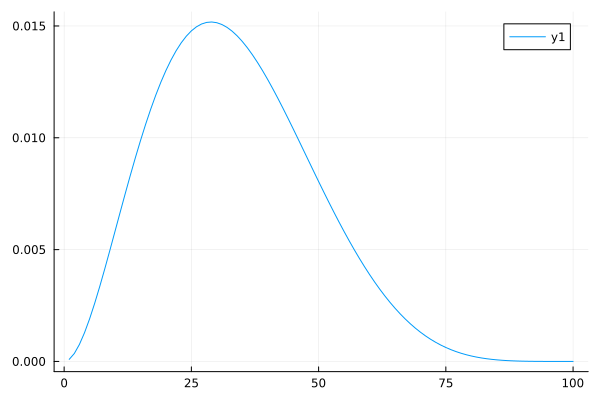

In [15]:
u0(x) = x^2*(1-x)^5
#u0(x) = 1 - abs(x - 1/2)

u0_h_full = u0.((0:(N+1))./ (N+1))
    
u0_h = u0_h_full[2:end-1]
plot(u0_h)

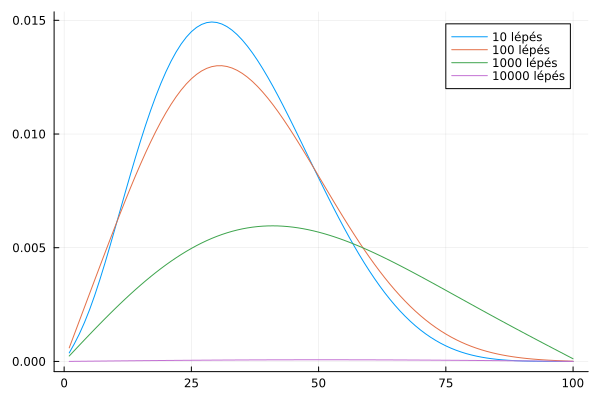

In [16]:
p = plot()

for num_steps = [10, 100, 1000, 10_000]
    plot!(collect(take(drop(iterate(ee_step, u0_h), num_steps), 1)), label="$num_steps lépés")
end

display(p)

### 11. Feladat

Ismételjük meg az előző feladatot az IE módszerrel és vessük össze a tapasztalatainkat az előző feladatnál tapasztaltakkal.

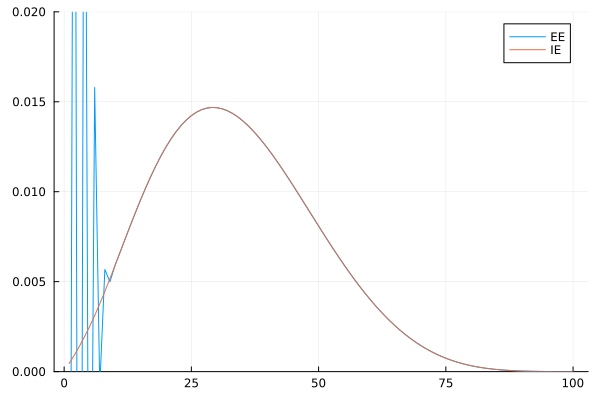

In [25]:
dt = dx^2
plot(collect(take(drop(iterate(x -> x + dt*A*x, u0_h), 10), 1)), label="EE", ylim=(0, 0.02))
plot!(collect(take(drop(iterate(x -> (I-dt*A)\x, u0_h), 10), 1)), label="IE")